## position salaries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
data = pd.read_csv('C:/Users/Public/Position_Salaries.csv')
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes
None


In [18]:
print(data.describe())

          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


In [19]:
print(data.isnull().sum())

Position    0
Level       0
Salary      0
dtype: int64


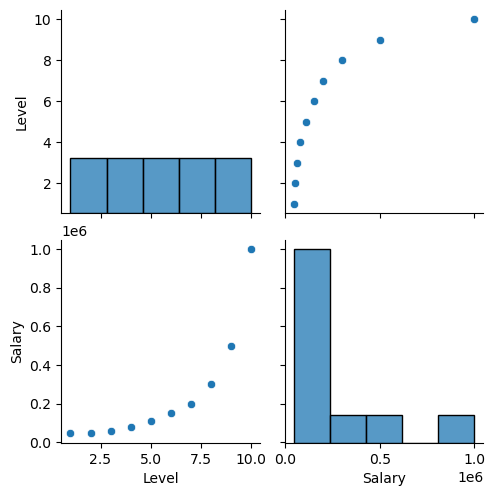

In [20]:
sns.pairplot(data)
plt.show()

In [21]:
X = data['Level'].values.reshape(-1, 1)  
y = data['Salary'].values

In [22]:
poly_reg = PolynomialFeatures(degree=4)  
X_poly = poly_reg.fit_transform(X)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

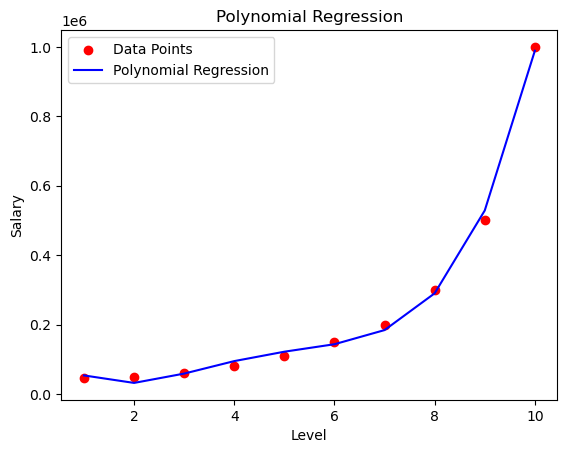

In [24]:
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [25]:
y_pred = lin_reg.predict(X_poly)

In [26]:
r_squared = r2_score(y, y_pred)
print("R-squared:", r_squared)

R-squared: 0.9973922891706614


In [27]:
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 210343822.84382007


In [28]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 14503.234909626888


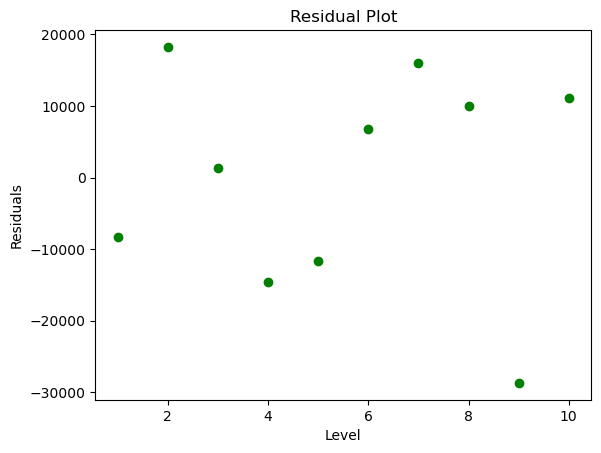

In [29]:
residuals = y - y_pred
plt.scatter(X, residuals, color='green')
plt.title('Residual Plot')
plt.xlabel('Level')
plt.ylabel('Residuals')
plt.show()

In [30]:
new_level = 6.5
new_salary_pred = lin_reg.predict(poly_reg.transform([[new_level]]))
print("Predicted salary for level 6.5:", new_salary_pred[0])

Predicted salary for level 6.5: 158862.45265152678
